# Podstawy analityki w Pythonie

Polecany notebook do nauki: https://infosecjupyterthon.com/workshops/day1/day1-3-Data-Analysis-with-Pandas%20Intro.html

In [1]:
#!pip install pandas

In [2]:
import pandas as pd

**Pandas Series**

https://pandas.pydata.org/docs/reference/api/pandas.Series.html

In [3]:
# standardowe index'y
data = ["Item 1", "Item 2", "Item 3"]
pd.Series(data, index=[1,2,3])

1    Item 1
2    Item 2
3    Item 3
dtype: object

In [4]:
# niestandardowe index'y
data = {"A": "Item 1", "B": "Item 2", "C": "Item 3"}
pd.Series(data)

A    Item 1
B    Item 2
C    Item 3
dtype: object

**Pandas DataFrame**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [5]:
data = {"Name": ["Item 1", "Item 2", "Item 3"], "Value": ["6.0", "3.2", "11.9"], "Count": [111, 720, 82]}
#pd.DataFrame(data)
#pd.DataFrame(data, index=["Item 1", "Item 2", "Item 3"])
df = pd.DataFrame(data).set_index('Name')
df

,Value,Count
Name,,
Item 1,6.0,111
Item 2,3.2,720
Item 3,11.9,82


In [6]:
# kolumny

df.columns

Index(['Value', 'Count'], dtype='object')

In [7]:
#index'y wierszy

df.index

Index(['Item 1', 'Item 2', 'Item 3'], dtype='object', name='Name')

In [8]:
df

,Value,Count
Name,,
Item 1,6.0,111
Item 2,3.2,720
Item 3,11.9,82


In [9]:
# odwołanie do konkretnej komórki - przykład

df.at["Item 1", "Value"]

'6.0'

In [10]:
# odwołanie do konkretnego wiersza - przykład

df.loc["Item 2"]
#df.iloc[2]

Value    3.2
Count    720
Name: Item 2, dtype: object

In [11]:
# odwołanie do kolumny/grupy kolumn - przykłady

df["Value"]
#df[["Value", "Count"]]

Name
Item 1     6.0
Item 2     3.2
Item 3    11.9
Name: Value, dtype: object

In [12]:
# pojedyncza kolumna DataFrame to w rzeczywistości obiekt Pandas Series

type(df['Value'])

pandas.core.series.Series

In [13]:
type(df[["Value", "Count"]])

pandas.core.frame.DataFrame

In [14]:
# sprawdzenie typów danych w poszczególnych kolumnach

df.dtypes

Value    object
Count     int64
dtype: object

In [15]:
df

,Value,Count
Name,,
Item 1,6.0,111
Item 2,3.2,720
Item 3,11.9,82


In [16]:
# Dodanie nowej kolumny
df['UserName'] = ['SYSTEM', 'SYSTEM', 'MSTICAdmin']

In [17]:
df

,Value,Count,UserName
Name,,,
Item 1,6.0,111,SYSTEM
Item 2,3.2,720,SYSTEM
Item 3,11.9,82,MSTICAdmin


In [18]:
# przykład odwołania do wierszy dla których mamy porządaną wartość w wybranej kolumnie

df.loc[df["UserName"] == "SYSTEM"]

,Value,Count,UserName
Name,,,
Item 1,6.0,111,SYSTEM
Item 2,3.2,720,SYSTEM


In [19]:
df[df["UserName"].str.endswith("Admin")]

,Value,Count,UserName
Name,,,
Item 3,11.9,82,MSTICAdmin


In [20]:
df[df["UserName"].str.contains("Admi")]

,Value,Count,UserName
Name,,,
Item 3,11.9,82,MSTICAdmin


In [21]:
df[df["UserName"].str.startswith("MS")]

,Value,Count,UserName
Name,,,
Item 3,11.9,82,MSTICAdmin


In [22]:
# odwołanie do konkretnych wierszy na podstawie wielu warunków

df[(df["Count"] <= 200) & (df["UserName"].isin(["SYSTEM", "Test"]))]

,Value,Count,UserName
Name,,,
Item 1,6.0,111,SYSTEM


In [23]:
# sortowanie wartości po wybranej kolumnie

df.sort_values(by = 'Count')

,Value,Count,UserName
Name,,,
Item 3,11.9,82,MSTICAdmin
Item 1,6.0,111,SYSTEM
Item 2,3.2,720,SYSTEM


<Axes: xlabel='Name'>

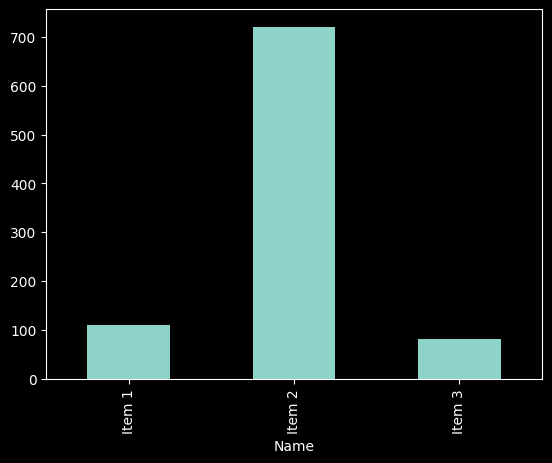

In [24]:
# przykładowy wykres

df["Count"].plot(kind='bar') #kind - rodzaj wykresu, w tym wypadku słupkowy

Więcej podstaw w podlinkowanym na początku sekcji notebook'u. Pełna dokumentacja Pandas: https://pandas.pydata.org. 

# Projekt: Wzbogacanie alertów (alert enrichment)

## Krok 1 - import modułów

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import requests


## Krok 2 - definicja funkcji do pobierania danych lokalizacyjncyh

In [26]:
def get_ip_location(ip):
    response = requests.get(f"http://ip-api.com/json/{ip}")
    data = response.json()
    if data['status'] == 'success':
        return {
            'kraj': data.get('country'),
            'miasto': data.get('city'),
            'dostawca_usług_internetowych': data.get('isp')
        }
    else:
        return None


## Krok 3 - Przykładowe dane

In [27]:
data = {
    'alert_id': [1, 2, 3, 4, 5],
    'ip_address': ['8.8.8.8', '8.8.4.4', '212.77.100.83', '208.67.222.222', '194.29.133.3'],
    'severity': ['high', 'medium', 'low', 'medium', 'high'],
    'threat_type': ['malware', 'phishing', 'adware', 'malware', 'phishing'],
    'alert_time': pd.to_datetime(['2023-11-01 08:30', '2023-11-01 09:15', '2023-11-01 09:45', '2023-11-01 10:05', '2023-11-01 10:45'])
}
df = pd.DataFrame(data)


# Krok 4 - Funkcja do wzbogacania alertów (alert enrichment)

In [28]:
def enrich_ip_addresses(df, ip_column):
    enriched_data = []
    for ip in df[ip_column]:
        location = get_ip_location(ip)
        enriched_data.append(location or {'kraj': None, 'miasto': None, 'dostawca_usług_internetowych': None})
        
    return pd.concat([df, pd.DataFrame(enriched_data)], axis=1)


## Krok 5 - Wzbogacenie danych i wyświetlenie DataFrame

In [29]:
enriched_df = enrich_ip_addresses(df, 'ip_address')
enriched_df


,alert_id,ip_address,severity,threat_type,alert_time,kraj,miasto,dostawca_usług_internetowych
0,1,8.8.8.8,high,malware,2023-11-01 08:30:00,United States,Ashburn,Google LLC
1,2,8.8.4.4,medium,phishing,2023-11-01 09:15:00,United States,Ashburn,Google LLC
2,3,212.77.100.83,low,adware,2023-11-01 09:45:00,Poland,Warsaw,Wirtualna Polska Media S.A.
3,4,208.67.222.222,medium,malware,2023-11-01 10:05:00,United States,San Francisco,"Cisco OpenDNS, LLC"
4,5,194.29.133.3,high,phishing,2023-11-01 10:45:00,Poland,Warsaw,Politechnika Warszawska


## Krok 6 - Prosta wizualizacja: histogram złoszeń wg. severity

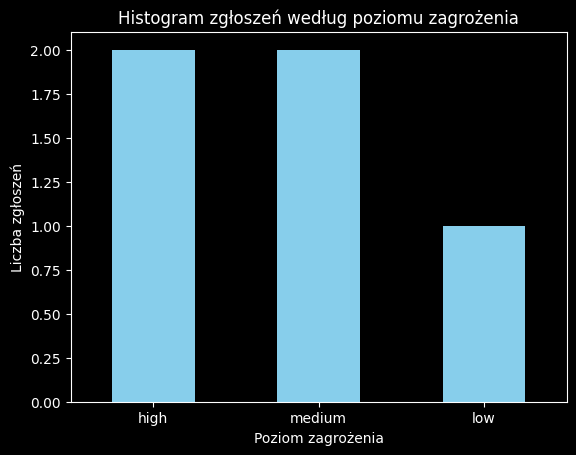

In [30]:
# Tworzymy histogram severities
enriched_df['severity'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram zgłoszeń według poziomu zagrożenia')
plt.xlabel('Poziom zagrożenia')
plt.ylabel('Liczba zgłoszeń')
plt.xticks(rotation=0)
plt.show()


## Krok 7 - WIzualizacja danych - liczba zgłoszeń na typ zagrożenia

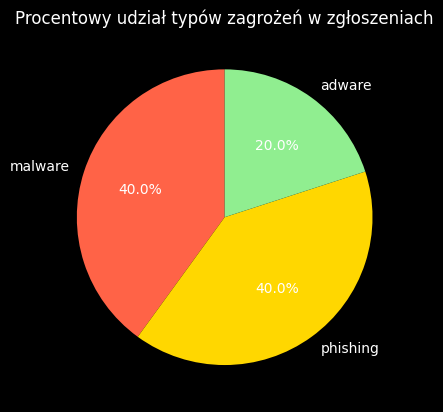

In [31]:
# Tworzymy wykres kołowy dla typów zagrożeń
enriched_df['threat_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['tomato', 'gold', 'lightgreen'])
plt.title('Procentowy udział typów zagrożeń w zgłoszeniach')
plt.ylabel('')  # Usunięcie etykiety y, która jest domyślnie 'threat_type'
plt.show()


## Zadanie: Wyrysowanie wykresu częstotliwości występowania alertów w zależności od kraju

Stwórz wykres słupkowy, który pokaże rozkład liczby alertów w zależności od kraju pochodzenia. Dodaj tytuł wykresu oraz etykiety osi, aby wykres był czytelny.

**Wskazówka:** Wykorzystaj funkcję value_counts() na kolumnie zawierającej informacje o kraju, aby uzyskać liczbę wystąpień dla każdego kraju, a następnie użyj tej serii danych do stworzenia wykresu za pomocą metody plot() z Pandas lub biblioteki Matplotlib.

### Zadanie Krok 1 - Agregacja danych, aby uzyskać liczbę alertów dla każdego kraju

In [32]:
counts = enriched_df['kraj'].value_counts()

### Zadanie Krok 2 - Stwórz wykres słupkowy przedstawiający liczbę alertów dla poszczególnych krajów.

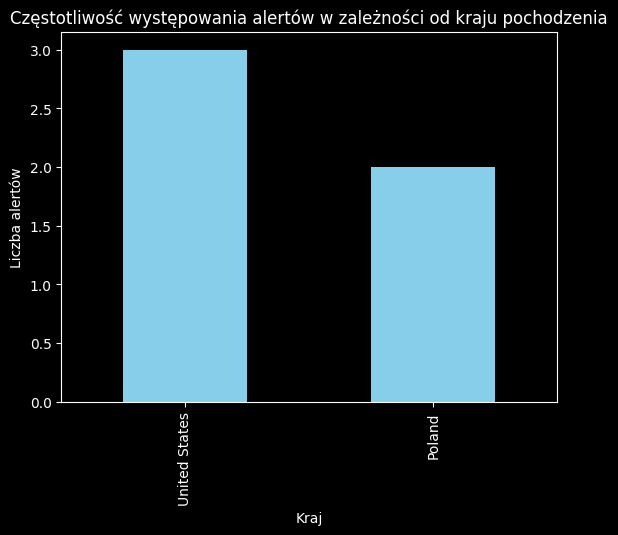

In [36]:
counts.plot(kind='bar', color='skyblue')
plt.title("Częstotliwość występowania alertów w zależności od kraju pochodzenia")
plt.xlabel("Kraj")
plt.ylabel("Liczba alertów")
plt.show()